In [92]:
import networkx as nx
from matplotlib import pyplot as plt
from itertools import combinations

In [50]:
#['Abhay', 'Vijay', 'Ragha', 'Balaji', 'Anu'] ['Abhay', 'Ragha', 'Aryan', 'Abhishek', 'Adya']
social_g = {
  'Aryan': [('Adya', 4), ('Vijay', 2), ('Ragha', 1)],
  'Adya': [('Aryan', 1), ('Vijay', 2), ('Abhishek', 3)], 
  'Abhay': [('Aryan', 1), ('Abhishek', 4), ('Anu', 5)],
  'Abhishek': [('Adya', 2), ('Vijay', 3)],
  'Akash': [('Balaji',1), ('Ragha', 5)],
  'Vijay': [('Abhay', 1), ('Adya', 4), ('Abhishek', 5)],
  'Ragha': [('Aryan', 1), ('Abhay', 4), ('Vijay', 5)],
  'Anu': [('Balaji', 1), ('Aryan', 4)],
  'Balaji': [('Adya', 1), ('Aryan', 4), ('Abhay', 5)],
  'Nigga': [('Aryan',3)],
}
Social = nx.DiGraph()
for node in social_g:
    for k in social_g[node]:
        Social.add_edge(node, k[0], weight= k[1])

In [51]:
edge_data_list = [(source, target, data) for source, target, data in Social.edges(data=True)]
print(edge_data_list)

[('Aryan', 'Adya', {'weight': 4}), ('Aryan', 'Vijay', {'weight': 2}), ('Aryan', 'Ragha', {'weight': 1}), ('Adya', 'Aryan', {'weight': 1}), ('Adya', 'Vijay', {'weight': 2}), ('Adya', 'Abhishek', {'weight': 3}), ('Vijay', 'Abhay', {'weight': 1}), ('Vijay', 'Adya', {'weight': 4}), ('Vijay', 'Abhishek', {'weight': 5}), ('Ragha', 'Aryan', {'weight': 1}), ('Ragha', 'Abhay', {'weight': 4}), ('Ragha', 'Vijay', {'weight': 5}), ('Abhishek', 'Adya', {'weight': 2}), ('Abhishek', 'Vijay', {'weight': 3}), ('Abhay', 'Aryan', {'weight': 1}), ('Abhay', 'Abhishek', {'weight': 4}), ('Abhay', 'Anu', {'weight': 5}), ('Anu', 'Balaji', {'weight': 1}), ('Anu', 'Aryan', {'weight': 4}), ('Akash', 'Balaji', {'weight': 1}), ('Akash', 'Ragha', {'weight': 5}), ('Balaji', 'Adya', {'weight': 1}), ('Balaji', 'Aryan', {'weight': 4}), ('Balaji', 'Abhay', {'weight': 5}), ('Nigga', 'Aryan', {'weight': 3})]


In [52]:
def generate_user_follow_suggestions(user_follow_data, user):
    # Create a graph to represent user follow relationships
    Social = nx.Graph()

    # Add user nodes and their follow relationships as edges
    for node in user_follow_data:
        for k in user_follow_data[node]:
            Social.add_edge(node, k[0], weight= k[1])

    # Perform user follow suggestions using graph algorithms
    suggestions = []
    degree_centrality = nx.degree_centrality(Social)
    eigenvector_centrality = nx.eigenvector_centrality(Social, max_iter=1000)
    sorted_users = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
    user_to_recommend = user
    print(degree_centrality)

    
    if(user not in degree_centrality):
        suggestions += list(nx.articulation_points(Social))
        for user, centrality in sorted_users:
            if user != user_to_recommend and Social.has_edge(user_to_recommend, user) == False:
                suggestions.append(user)
                if len(suggestions) >= 5:  # Limit the number of recommendations
                    break

    else:
        pagerank_scores = nx.pagerank(Social)
        neighbours = list(Social.neighbors(user))
        n = 5
        neighbours_sorted = sorted(neighbours,
            key= lambda x: pagerank_scores[x], reverse=True)
    
        suggestions += neighbours_sorted[:n]

    return suggestions

# Example user follow data (follower, following)
user_follow_data = social_g

user_follow_suggestions = generate_user_follow_suggestions(user_follow_data, 'Nigga')
print(user_follow_suggestions)

{'Aryan': 0.7777777777777777, 'Adya': 0.4444444444444444, 'Vijay': 0.5555555555555556, 'Ragha': 0.4444444444444444, 'Abhishek': 0.3333333333333333, 'Abhay': 0.6666666666666666, 'Anu': 0.3333333333333333, 'Akash': 0.2222222222222222, 'Balaji': 0.5555555555555556, 'Nigga': 0.1111111111111111}
['Aryan']


In [53]:
def FoFs(user : str, Graph : nx.Graph) -> set:

    """
    This function calcuates the first degree mutual friends and will return set of those users.

    Returns:
        set: set of mutual friends
    """
    if user not in Graph.nodes():
        raise(Exception("No such user"))
    connection = list(Graph.neighbors(user)) # stores the list of neighbors
    mutconnlist = list(set(Graph.neighbors(x)) for x in connection) # stores the list of list of neigbors 
    
    # create a set to store all connections
    totalconn = set()
    for friends in mutconnlist:
        for indivdual in friends:
            totalconn.add(indivdual)
            
    # remove already known connections
    totalconn = totalconn - set(connection)
    totalconn.remove(user) # remove the user
    return totalconn

In [96]:
graph = nx.Graph()

graph.add_edges_from(edge_data_list)
graph.add_nodes_from(['Siddu', 'Sahil'])
graph.add_edges_from([('Vijay','Sahil'), ('Aryan', 'Sahil'), ('Adya','Sahil')])
graph.add_edge('Sahil','Siddu')
graph.add_edges_from([('Siddu','Vikram'),('Vikram','Tharun'),('Siddu','Tharun')])
print(graph.edges())

[('Aryan', 'Adya'), ('Aryan', 'Vijay'), ('Aryan', 'Ragha'), ('Aryan', 'Abhay'), ('Aryan', 'Anu'), ('Aryan', 'Balaji'), ('Aryan', 'Nigga'), ('Aryan', 'Sahil'), ('Adya', 'Vijay'), ('Adya', 'Abhishek'), ('Adya', 'Balaji'), ('Adya', 'Sahil'), ('Vijay', 'Abhay'), ('Vijay', 'Abhishek'), ('Vijay', 'Ragha'), ('Vijay', 'Sahil'), ('Ragha', 'Abhay'), ('Ragha', 'Akash'), ('Abhishek', 'Abhay'), ('Abhay', 'Anu'), ('Abhay', 'Balaji'), ('Anu', 'Balaji'), ('Balaji', 'Akash'), ('Siddu', 'Sahil'), ('Siddu', 'Vikram'), ('Siddu', 'Tharun'), ('Vikram', 'Tharun')]


In [97]:
FoFs('Nigga', Graph = graph)

{'Abhay', 'Adya', 'Anu', 'Balaji', 'Ragha', 'Sahil', 'Vijay'}

In [85]:
print(nx.degree_centrality(graph))
print(nx.closeness_centrality(graph))
print(nx.eigenvector_centrality(graph))
print(nx.betweenness_centrality(graph))

{'Aryan': 0.6153846153846154, 'Adya': 0.38461538461538464, 'Vijay': 0.46153846153846156, 'Ragha': 0.3076923076923077, 'Abhishek': 0.23076923076923078, 'Abhay': 0.46153846153846156, 'Anu': 0.23076923076923078, 'Balaji': 0.38461538461538464, 'Akash': 0.15384615384615385, 'Nigga': 0.07692307692307693, 'Siddu': 0.23076923076923078, 'Sahil': 0.3076923076923077, 'Vikram': 0.15384615384615385, 'Tharun': 0.15384615384615385}
{'Aryan': 0.65, 'Adya': 0.5652173913043478, 'Vijay': 0.5909090909090909, 'Ragha': 0.48148148148148145, 'Abhishek': 0.43333333333333335, 'Abhay': 0.52, 'Anu': 0.4642857142857143, 'Balaji': 0.5, 'Akash': 0.37142857142857144, 'Nigga': 0.40625, 'Siddu': 0.41935483870967744, 'Sahil': 0.5652173913043478, 'Vikram': 0.30952380952380953, 'Tharun': 0.30952380952380953}
{'Aryan': 0.4630011913492402, 'Adya': 0.33385556501627806, 'Vijay': 0.3929554216498595, 'Ragha': 0.276082880213175, 'Abhishek': 0.22571932372636258, 'Abhay': 0.3863096749529601, 'Anu': 0.23545963985718926, 'Balaji': 0

### betweenness centrality
    this tells how many shortest paths pass through that particular node 
    it is centre of connection 
    this node bridge between 2 or more community 

In [91]:
k = nx.find_cliques(graph)
print(list(k))
k = nx.bridges(graph)
print(list(k))
print('when these connections are removed this will form many different subgraphs')

[['Aryan', 'Adya', 'Vijay', 'Sahil'], ['Aryan', 'Adya', 'Balaji'], ['Aryan', 'Abhay', 'Vijay', 'Ragha'], ['Aryan', 'Abhay', 'Anu', 'Balaji'], ['Aryan', 'Nigga'], ['Vikram', 'Siddu', 'Tharun'], ['Akash', 'Balaji'], ['Akash', 'Ragha'], ['Abhishek', 'Vijay', 'Adya'], ['Abhishek', 'Vijay', 'Abhay'], ['Siddu', 'Sahil']]
[('Aryan', 'Nigga'), ('Siddu', 'Sahil')]
when these connections are removed this will form many different subgraphs


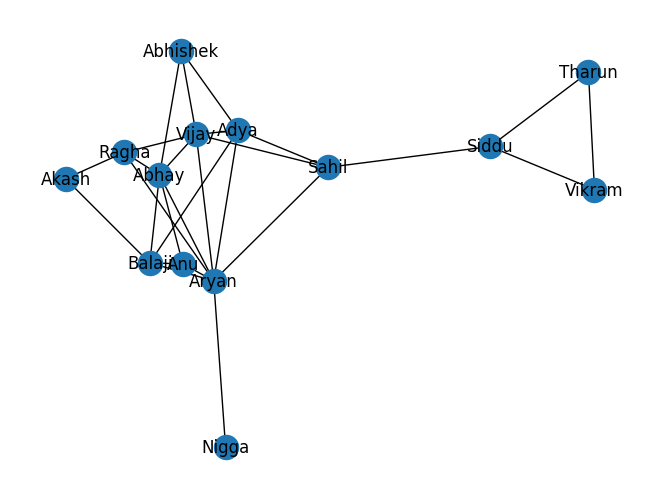

In [100]:

nx.draw_spring(graph,with_labels=True)
plt.show()

betweenness centrality of 1 is very high because it is being bridge between 2 community

cliques will help us find the possible communities in the graph (nx.find_cliques()) or maximal complete subgrpahs ->(complete graph : all nodes are connected to each other)